# Sentiment Analysis and Visualization
This notebook analyzes sentiment patterns in a given social media dataset.

In [1]:
!pip install pandas plotly dash jupyter-dash wordcloud nltk dash streamlit


In [2]:
import pandas as pd
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import html, dcc,Dash,dash_table
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from wordcloud import WordCloud
import base64
from io import BytesIO
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from textblob import TextBlob
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from dash.dependencies import Input, Output

In [3]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\galig\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
data = pd.read_csv(r"C:\Users\galig\Tasks\twitter_training.csv")  
data['clean_text'] = data['Tweet_TEXT'].str.lower().str.replace('[^\w\s]', '')

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\galig\AppData\Local\Temp\ipykernel_4616\45209713.py:2: SyntaxWarning: invalid escape sequence '\w'
  data['clean_text'] = data['Tweet_TEXT'].str.lower().str.replace('[^\w\s]', '')


In [5]:
data

Sentiment_ID      Company Sentiment  \
0              2401  Borderlands  Positive   
1              2401  Borderlands  Positive   
2              2401  Borderlands  Positive   
3              2401  Borderlands  Positive   
4              2401  Borderlands  Positive   
...             ...          ...       ...   
74677          9200       Nvidia  Positive   
74678          9200       Nvidia  Positive   
74679          9200       Nvidia  Positive   
74680          9200       Nvidia  Positive   
74681          9200       Nvidia  Positive   

                                              Tweet_TEXT  \
0      im getting on borderlands and i will murder yo...   
1      I am coming to the borders and I will kill you...   
2      im getting on borderlands and i will kill you ...   
3      im coming on borderlands and i will murder you...   
4      im getting on borderlands 2 and i will murder ...   
...                                                  ...   
74677  Just realized that the Windows partition of my...   
74678  Just realized that my Mac window partition is ...   
74679  Just realized the windows partition of my Mac ...   
74680  Just realized between the windows partition of...   
74681  Just like the windows partition of my Mac is l...   

                                              clean_text  
0      im getting on borderlands and i will murder yo...  
1      i am coming to the borders and i will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  just realized that the windows partition of my...  
74678  just realized that my mac window partition is ...  
74679  just realized the windows partition of my mac ...  
74680  just realized between the windows partition of...  
74681  just like the windows partition of my mac is l...  

[74682 rows x 5 columns]

In [6]:
sia = SentimentIntensityAnalyzer()
data['clean_text'] = data['clean_text'].fillna('') 
data['sentiment_score'] = data['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['Sentiment'] = data['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [7]:
sentiment_counts = data["Sentiment"].value_counts().reset_index()
sentiment_counts.columns = ["Sentiment", "Count"] 

In [8]:
fig_sentiment_dist = px.bar(
    sentiment_counts,
    x="Sentiment",
    y="Count",
    labels={"Sentiment": "Sentiment Category", "Count": "Number of Tweets"},
    title="Sentiment Distribution",
    color="Sentiment"
)

In [9]:
fig_sentiment_dist.show()

In [10]:
fig_company_sentiment = px.histogram(
    data,
    x="Company",
    color="Sentiment",
    barmode="stack",
    title="Company-Wise Sentiment Distribution",
    labels={"Company": "Company", "count": "Tweet Count"}
)

In [11]:
fig_company_sentiment.show()

In [12]:
def create_wordcloud(sentiment):
    text = " ".join(data[data["Sentiment"] == sentiment]["Tweet_TEXT"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    buffer = BytesIO()
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(buffer, format="png")
    plt.close()
    buffer.seek(0)
    encoded_image = base64.b64encode(buffer.getvalue()).decode()
    return encoded_image

In [13]:
app = Dash(__name__)

In [14]:
fig_pie = px.pie(data, names='Sentiment', title="Sentiment Distribution")

In [15]:
fig_pie.show()

In [16]:
if 'category_column' in data.columns:  # Replace 'category_column' with your actual column name
    sentiment_heatmap = data.groupby(['category_column', 'sentiment']).size().reset_index(name='count')
    fig_heatmap = px.density_heatmap(
        sentiment_heatmap,
        x='category_column',
        y='sentiment',
        z='count',
        title="Sentiment Intensity Heatmap",
        color_continuous_scale='Blues'
    )
else:
    fig_heatmap = None


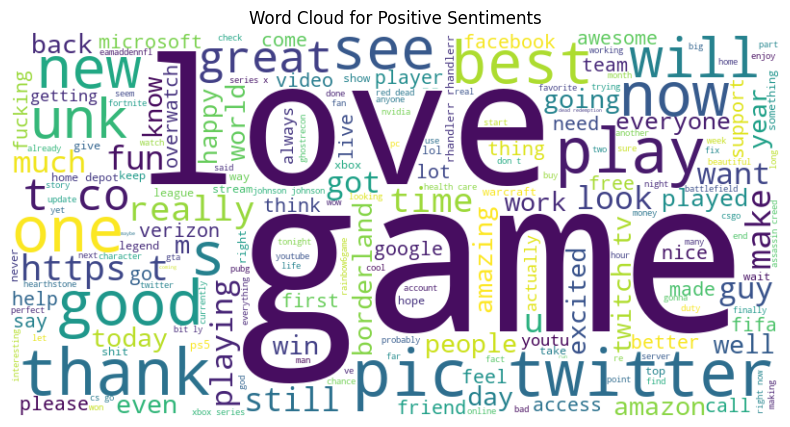

In [17]:
positive_words = ' '.join(data[data['Sentiment'] == 'positive']['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments')
plt.show()

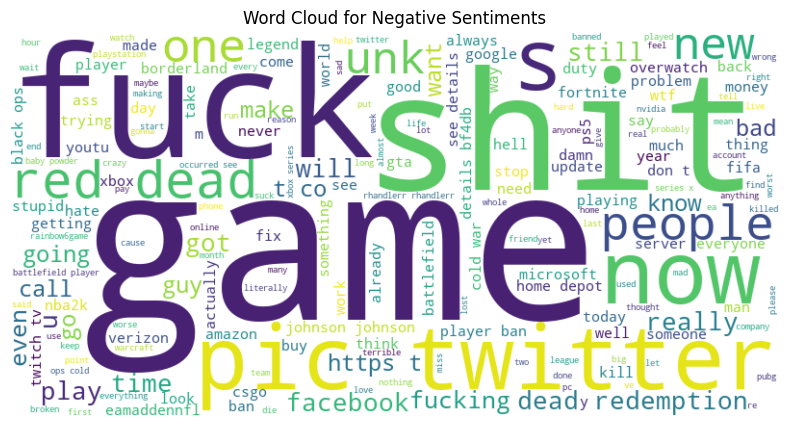

In [18]:
negative_words = ' '.join(data[data['Sentiment'] == 'negative']['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiments')
plt.show()

In [19]:
validation_file_path = r"C:\Users\galig\Tasks\twitter_validation.csv"
data_validation = pd.read_csv(validation_file_path)

In [20]:
print("Validation Dataset Info:")
print(data_validation.info())

Validation Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sentiment_ID         1000 non-null   int64 
 1   Company              1000 non-null   object
 2   Sentiment            1000 non-null   object
 3   Tweet_TEXT           1000 non-null   object
 4   Predicted_Sentiment  1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None


In [21]:
missing_values = data_validation.isnull().sum()
print("\nMissing Values in Validation Dataset:")
print(missing_values)


Missing Values in Validation Dataset:
Sentiment_ID           0
Company                0
Sentiment              0
Tweet_TEXT             0
Predicted_Sentiment    0
dtype: int64


In [22]:
required_columns = ["Tweet_TEXT", "Sentiment"]
for column in required_columns:
    if column not in data_validation.columns:
        raise ValueError(f"Column '{column}' is missing from the dataset.")

In [23]:
def predict_sentiment(text):
    return "Neutral"

In [24]:
data_validation["Predicted_Sentiment"] = data_validation["Tweet_TEXT"].apply(predict_sentiment)

In [25]:
true_sentiments = data_validation["Sentiment"]
predicted_sentiments = data_validation["Predicted_Sentiment"]

In [26]:
report = classification_report(true_sentiments, predicted_sentiments, output_dict=False)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.00      0.00      0.00       172
    Negative       0.00      0.00      0.00       266
     Neutral       0.28      1.00      0.44       285
    Positive       0.00      0.00      0.00       277

    accuracy                           0.28      1000
   macro avg       0.07      0.25      0.11      1000
weighted avg       0.08      0.28      0.13      1000



c:\Users\galig\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\galig\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\galig\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [27]:
def predict_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

In [28]:
tweet_selector = widgets.Dropdown(
    options=[(f"Tweet {idx+1}: {row['Tweet_TEXT'][:50]}...", idx) for idx, row in data_validation.iterrows()],
    description='Select Tweet:',
    disabled=False
)

In [29]:
predict_button = widgets.Button(description="Predict Sentiment")

In [30]:
output = widgets.Output()

In [31]:
def on_button_click(b):
    with output:
        tweet_index = tweet_selector.value
        tweet_text = data_validation.iloc[tweet_index]['Tweet_TEXT']
        sentiment = predict_sentiment(tweet_text)
        print(f"Tweet: {tweet_text}")
        print(f"The predicted sentiment is: **{sentiment}**")

In [32]:
predict_button.on_click(on_button_click)

In [33]:
display(tweet_selector, predict_button, output)

Dropdown(description='Select Tweet:', options=(('Tweet 1: I mentioned on Facebook that I was struggling for ..…

Button(description='Predict Sentiment', style=ButtonStyle())

Output()

In [34]:
data_validation['Predicted_Sentiment'] = data_validation['Tweet_TEXT'].apply(predict_sentiment)

In [35]:
data_validation.to_csv(r"C:\Users\galig\Tasks\twitter_validation.csv", index=False)
print("Predicted Sentiments added successfully to the CSV file.")

Predicted Sentiments added successfully to the CSV file.


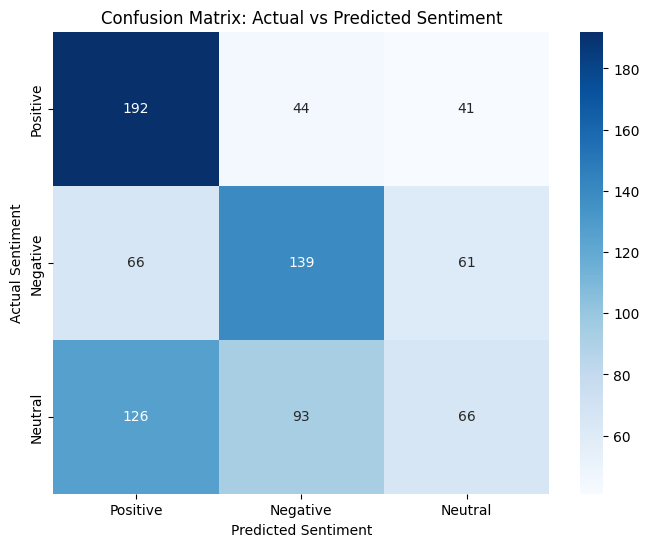

In [36]:
conf_matrix = confusion_matrix(data_validation['Sentiment'], data_validation['Predicted_Sentiment'], labels=['Positive', 'Negative', 'Neutral'])
fig = plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title("Confusion Matrix: Actual vs Predicted Sentiment")
plt.xlabel("Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.show()

In [37]:
sentiment_counts_actual = data_validation['Sentiment'].value_counts()
sentiment_counts_predicted = data_validation['Predicted_Sentiment'].value_counts()

In [38]:
df_sentiments = pd.DataFrame({
    'Sentiment': sentiment_counts_actual.index,
    'Actual': sentiment_counts_actual.values,
    'Predicted': sentiment_counts_predicted.reindex(sentiment_counts_actual.index).fillna(0).values
})

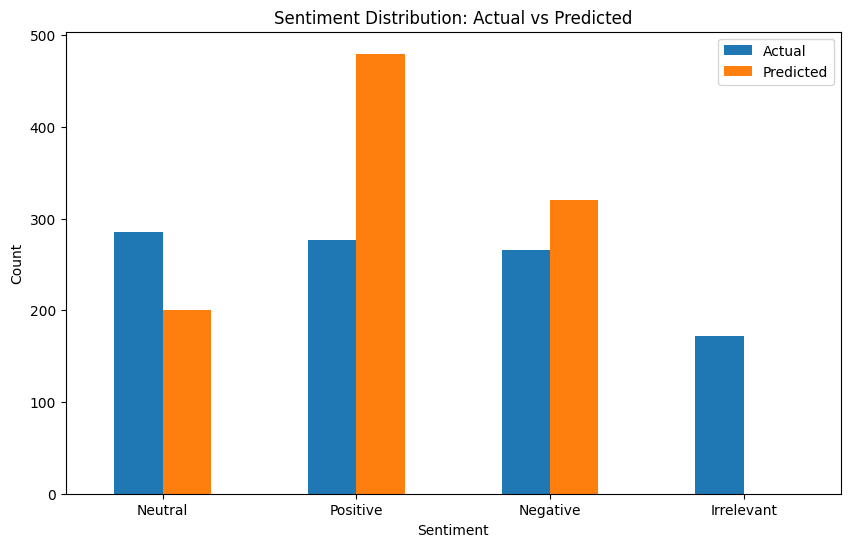

In [39]:
df_sentiments.set_index('Sentiment', inplace=True)
df_sentiments.plot(kind='bar', figsize=(10, 6))
plt.title("Sentiment Distribution: Actual vs Predicted")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


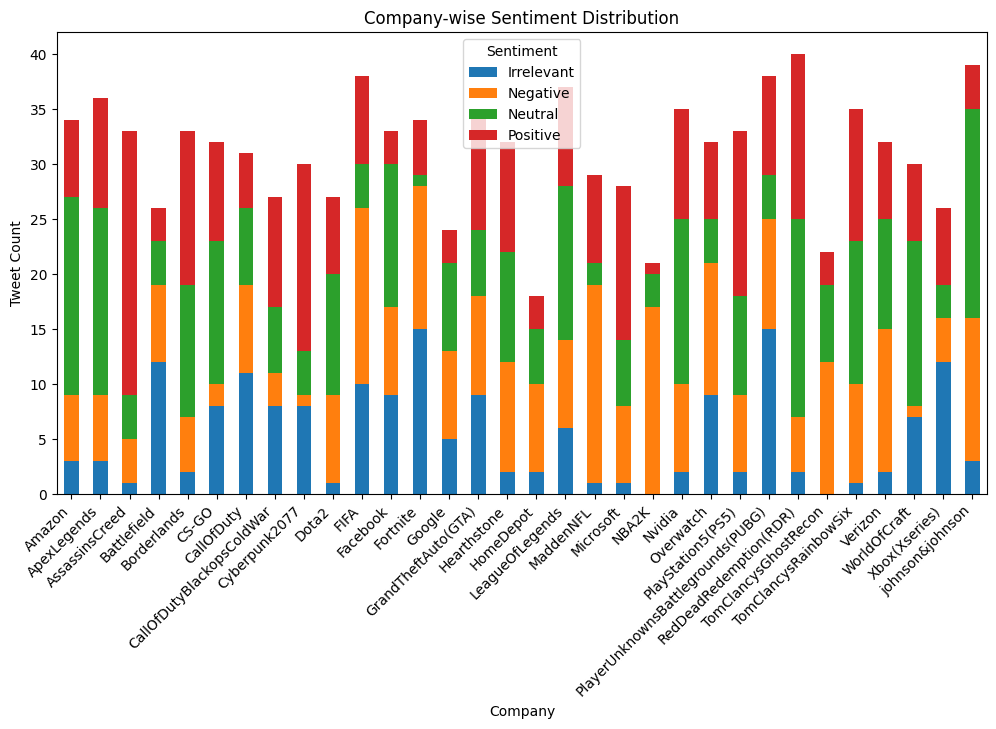

In [40]:
if 'Company' in data_validation.columns:
    company_sentiment = data_validation.groupby(['Company', 'Sentiment']).size().unstack().fillna(0)
    company_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title("Company-wise Sentiment Distribution")
    plt.xlabel("Company")
    plt.ylabel("Tweet Count")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Sentiment")
    plt.show()

In [41]:
def generate_wordcloud(sentiment):
    text = " ".join(data_validation[data_validation['Predicted_Sentiment'] == sentiment]['Tweet_TEXT'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.show()


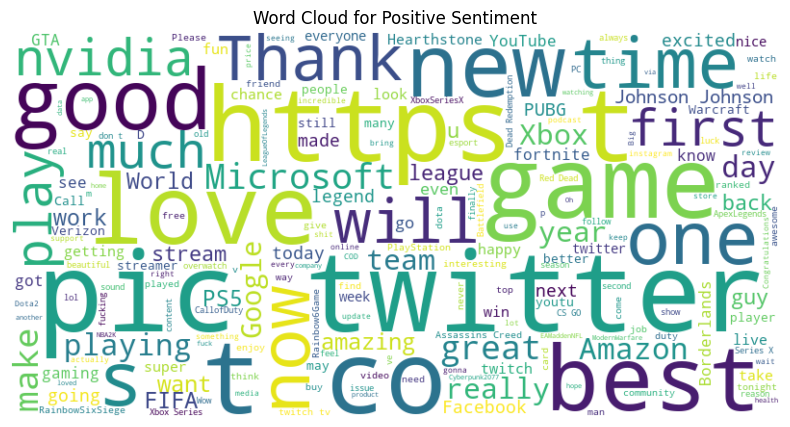

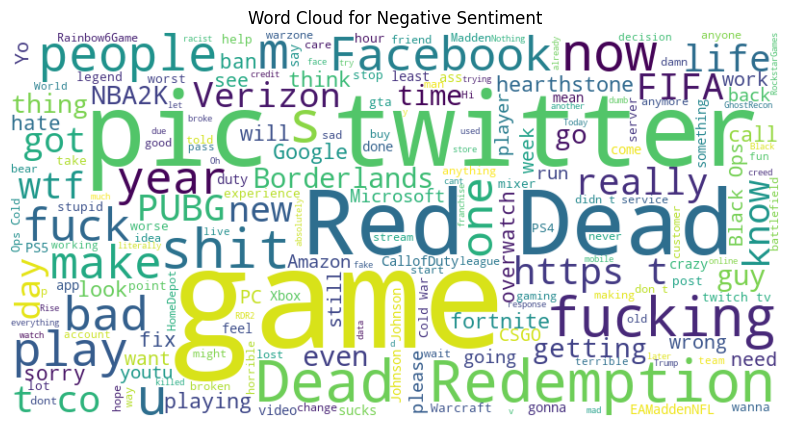

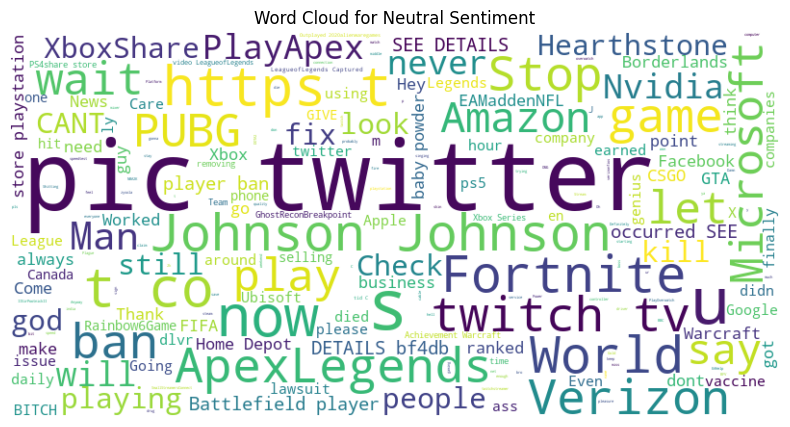

In [42]:
generate_wordcloud("Positive")
generate_wordcloud("Negative")
generate_wordcloud("Neutral")

In [43]:
app = Dash(__name__)

In [44]:
app.layout = html.Div([
    html.H1("Sentiment Analysis in Validation Tweets"),
    dcc.Dropdown(
        id="company-dropdown",
        options=[{"label": company, "value": company} for company in data_validation['Company'].unique()],
        value=data_validation['Company'].unique()[0],  # Default value
        style={'width': '50%'}
    ),
    dcc.Graph(id="sentiment-distribution"),
    dcc.Graph(id="company-sentiment-distribution")
])
@app.callback(
    Output("sentiment-distribution", "figure"),
    Output("company-sentiment-distribution", "figure"),
    Input("company-dropdown", "value")
)
def update_graphs(selected_company):
    filtered_df = data_validation[data_validation['Company'] == selected_company]
    sentiment_dist = filtered_df['Sentiment'].value_counts().reset_index(name='count')
    sentiment_dist.columns = ['Sentiment', 'count']
    predicted_sentiment_dist = filtered_df['Predicted_Sentiment'].value_counts().reset_index(name='count')
    predicted_sentiment_dist.columns = ['Sentiment', 'count']
    sentiment_fig = px.bar(
        sentiment_dist,
        x="Sentiment",
        y="count",
        labels={"Sentiment": "Sentiment", "count": "Count"},
        title=f"Sentiment Distribution for {selected_company} (Actual)"
    )
    predicted_sentiment_fig = px.bar(
        predicted_sentiment_dist,
        x="Sentiment",
        y="count",
        labels={"Sentiment": "Sentiment", "count": "Count"},
        title=f"Sentiment Distribution for {selected_company} (Predicted)"
    )
    return sentiment_fig, predicted_sentiment_fig
app.run_server(debug=True, use_reloader=False)
